
## Load the CSV Files


#####  Import the Pandas and Matplotlib libraries with the Pyplot module

In [1]:
# Add Matplotlib inline magic command

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Declare variables that connect to the CSV files in the Resources folder
# Files to load

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"



## Read each CSV file in Pandas.

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12




##  Explore the Data in Pandas before Merge



### Inspect the City Data DataFrame

In [5]:
# Get the columns and the rows that are not null.
# To get the name of each column and the number of rows that are not null, we can use the df.count() method.

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# to make sure there are no null values: Get the columns and the rows that are null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
# To get the data types of each column, we use the dtypes on the DataFrame.

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# How many data points are there for each type of city. Use the sum() method on the city_data_df 
# Use the unique() method on a specific column,to return an array, or list, of all the unique values of that column

# Get the unique values of the column type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# To get the total_number of data points for the cities,eg. Urban:
# Use the sum() method on the city_data_df for the type column where the condition equals either Urban, Suburban, or Rural.

# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
sum(city_data_df["type"]=="Rural")

18

### Inspect the Ride Data DataFrame

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object



## Merge DataFrames

In [13]:
# Merge on a column with the same data, and the same column name, in both DataFrames.
# Merge Syntax: new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


######    Create a Bubble Chart that showcases the avg.fare vs the total num of rides with bubble size based on
#####          the average number of drivers for each city type: urban, suburban, and rural.
#####               For the bubble chart, we will need to plot the following:

#########    The average fare for each type of city on the y-axis
#########    The total number of rides for each type city on the x-axis
#########    Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city
#########    Do the steps below to arrive at/before creating bubble chart



## Create DataFrames for Each Type of City

In [14]:
# Each new DF can be created by filtering the pyber_data_df DF, where the city type is equal to Urban, Suburban, or Rural.
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [15]:
# Create the Suburban city DataFrame.

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [16]:
# Create the Rural city DataFrame.

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural



## Get the Number of Riders for Each City Type

In [17]:
# To get the number of riders for each city by each type of city, we have to create a Series,
# where the index is the name of the city and the column is the number of riders for that city.

# Note:To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function and 
# add the column inside the parentheses.

# Get the number of riders for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Get the number of riders for Suburban cities.

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [19]:
# Get the number of riders for rural cities.

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


## Get the Average Fare for Each City Type

In [20]:
# Using the groupby() function, we can chain the mean() method to get the averages of the fare column.

# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


## Get the Average Number of Drivers for Each City Type

In [23]:
# Get the average number of drivers for each urban city.

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [24]:
# Get the average number of drivers for each suburban city.

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

In [25]:
# Get the average number of drivers for each rural city.

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64


## Create Bubble Charts  -- Using MATLAB method

#### Create each scatter plot individually and add them all to one chart.

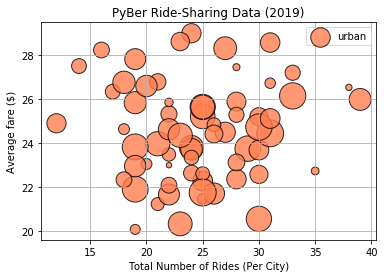

In [26]:
# Create the Urban Cities Scatter Plot/Bubble Chart

plt.scatter(urban_ride_count, urban_avg_fare,
            c="coral", 
            s=10*urban_driver_count, 
            edgecolor= "black",  linewidth= 1,
            alpha=0.8,  label="urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.grid(True)
           
#Add a legend
plt.legend()

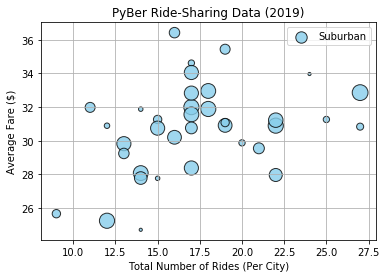

In [27]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

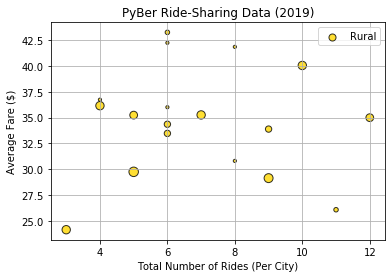

In [28]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


##  Create a Bubble Chart for All Cities

##### Combinea all three scatter plot code blocks in one Jupyter Notebook cell.

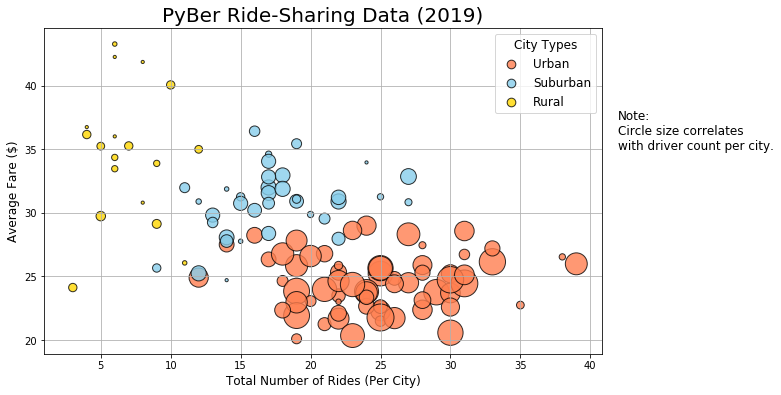

In [29]:
# Add the scatter charts for each type of city.

# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label/note about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()



## Summary Statistics for Number of Rides by City Type


##### 3 Ways to Calculate the Summary Statistics


##### Method 1: Using Pandas describe() Function

In [30]:
# Get summary statistics.
# The describe() function is a convenient tool to get a high-level summary statistics on a DataFrame or

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [31]:
# Get summary statistics.
# The describe() function is a convenient tool to get a high-level summary statistics on a DataFrame or

suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [32]:
# Get summary statistics.
# The describe() function is a convenient tool to get a high-level summary statistics on a DataFrame or

rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [33]:
# Summary Stats for SUBURBAN city ride_count
# Using the describe() function on the suburban_ride_count, what is the highest number of rides for a suburban city? = 27

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [34]:
# Summary Stats for RURAL city ride_count
#Using the describe() function on the rural_ride_count, what is the lowest number of rides for a rural city?

rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


##### Method 2: Using Pandas mean(), median(), and mode() 

In [35]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# What is the median(50th percentile) for the number or rides in the urban cities?
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [37]:
# What is the mode for the number or rides in the urban cities?
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64, 0    17
 dtype: int64, 0    6
 dtype: int64)

##### Method 3: Using NumPy mean() and median() Functions and SciPy mode() Function

In [38]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [39]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [40]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).



## Summary Statistics for the Fare by City Type

In [41]:
# Get the fares for the URBAN cities.
# This will help you determine which city types are generating the most money/revenue. 

urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [42]:
# Mean, Median Mode for the URBAN Cities
# Calculate the measures of central tendency for the average fare for the URBAN cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [43]:
# Get the fares for the SUBURBAN cities.
# This will help you determine which city types are generating the most money/revenue. 

suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [44]:
# Mean, Median Mode for the SUBURBAN Cities
# Calculate the measures of central tendency for the average fare for the SUBURBAN cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for urban trips is $24.64.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [45]:
# Get the fares for the RURAl cities.
# This will help you determine which city types are generating the most money/revenue. 

rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [46]:
# Mean, Median Mode for the RURAL cities
# Calculate the measures of central tendency for the average fare for the RURAL cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).



## Summary Statistics for the Number of Drivers by City Type

##### Create a Series for each city type based on the driver_count column in each city type DataFrame.

In [47]:
# Get the driver count data from the URBAN cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [48]:
# Skill Drill -- MEAN, MEDIAN, MODE
# Calculate the mean, median, and mode for the URBAN driver count Series using NumPy and SciPy statistics module.

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for rural trips is {mode_urban_drivers}.")

The mean number of drivers for urban trips is 37.
The median number of drivers for urban trips is 37.
The mode number of drivers for rural trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [49]:
# Get the driver count data from the SUBURBAN cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [50]:
# Skill Drill -- MEAN, MEDIAN, MODE
# Calculate the mean, median, and mode for the SUBURBAN driver count Series using NumPy and SciPy statistics module.

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers forsuburban trips is {mode_suburban_drivers}.")

The mean number of drivers for suburban trips is 14.
The median number of drivers for suburban trips is 16.
The mode number of drivers forsuburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [51]:
# Get the driver count data from the RURAL cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [52]:
# Skill Drill -- MEAN, MEDIAN, MODE
# Calculate the mean, median, and mode for the RURAL driver count Series using NumPy and SciPy statistics module.

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

The mean number of drivers for rural trips is 4.
The median number of drivers for rural trips is 4.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).



## Create Box-and-Whisker Plots for Ride_Count Data


##### Visualize the summary statistics and determine if there are any outliers by using box-and-whisker plots.

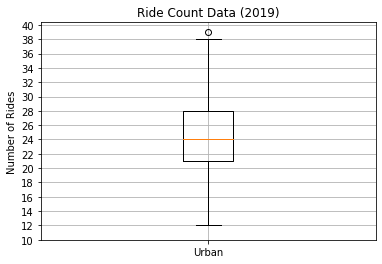

In [53]:
# Create a box-and-whisker plot for the URBAN cities ride count.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

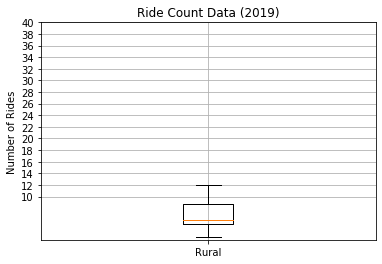

In [54]:
# Create a box-and-whisker plot for the SUBURBAN cities ride count.

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

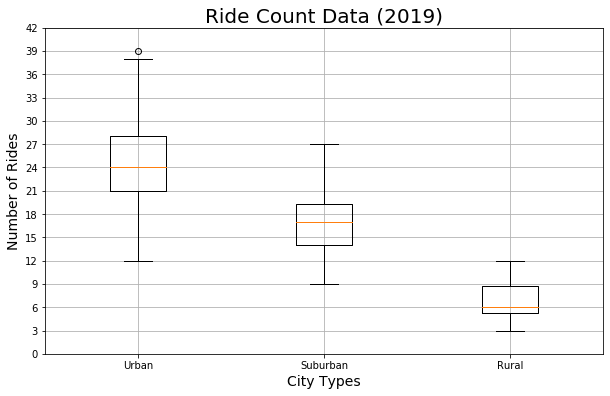

In [55]:
# To show all the city type box-and-whisker plots on one chart we need to modify the boxplot() function and add other features.
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Analysis/Fig2.png")
plt.show()


In [56]:
# We know that the outlier for the urban_ride_count is 39. 
# From this information, we can find out which city has the highest rider count.
# Get the city that matches 39.

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.



## Box-and-Whisker Plots for Ride_Fare Data

##### create box-and-whisker plots for the ride fare data with summary statistics.

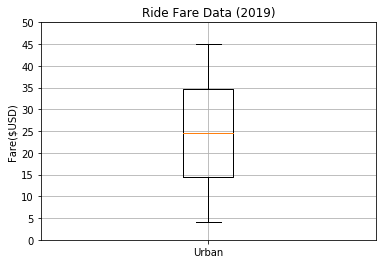

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [57]:
# Create a box-and-whisker plot for the URBAN fare data.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

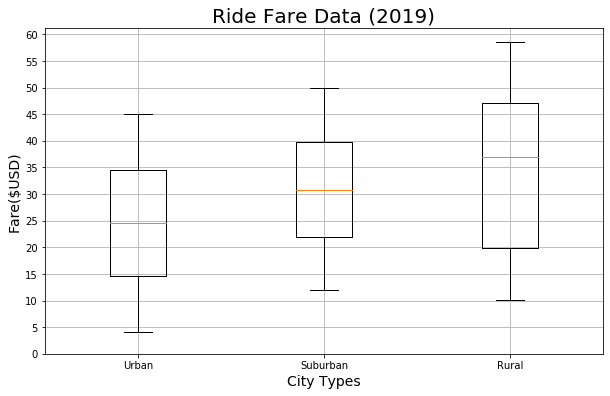

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [58]:
#Skill Drill:  Create a box-and-whisker plot that has ALL THREE CITY types’ fare data in one plot 

# To show all the city type box-and-whisker plots on one chart we need to modify the boxplot() function and add other features.
# Add all ride fare box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,65, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Analysis/Fig3.png")
plt.show()
print("Summary Statistics")
urban_fares.describe() 


## Box-and-Whisker Plots for Driver_Count Data

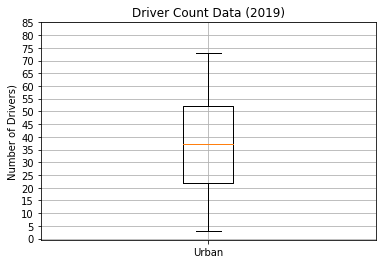

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [59]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

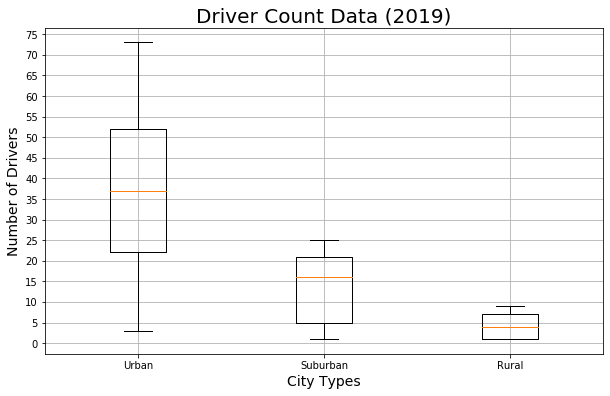

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [60]:
#Skill Drill:  Create a box-and-whisker plot that has ALL THREE CITY types’ driver count data in one plot 

# To show all the city type box-and-whisker plots on one chart we need to modify the boxplot() function and add other features.
# Add all driver count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Analysis/Fig4.png")
plt.show()
print("Summary Statistics")
urban_fares.describe() 


## Get the Percentage of Total Fares for Each City Type

In [61]:
# To get the total fares for city type, we need to create a Series where the index is the type of city on the pyber_data_df DF
# and the column is the sum of the fares for city type.
# To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function
# and add the column inside the parentheses.

# Get the sum of the $fares for each city type, to get the Series with the total num of fares/each city.

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [62]:
# Get the sum of All the fares in all cities.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [63]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64



#### Pie Chart for the Percentage of Fares by City Type

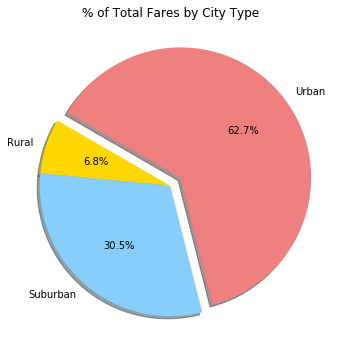

In [64]:
# Create a pie chart by using the MATLAB approach, using the plt.pie() function.
# Import mpl to change the plot configurations using rcParams.

import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/Fig5.png")
# Show Figure
plt.show()


## Get the Percentage of Total Ride(rs) for Each City Type

In [65]:
# Calculate the percentage of rides for each city type. One line coding
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

 

#### Pie Chart for the Percentage of Total Ride(rs) by City Type

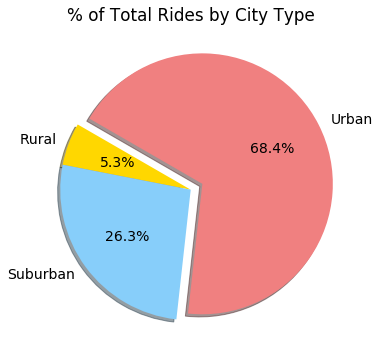

In [66]:
# Create a pie chart by using the MATLAB approach, using the plt.pie() function.
# Import mpl to change the plot configurations using rcParams.

import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/Fig6.png")
# Show Figure
plt.show()


## Get the Percentage of Total Drivers for Each City Type

In [67]:
# Calculate the percentage of rides for each city type. One line coding
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

 

#### Pie Chart for the Percentage of Total Drivers by City Type

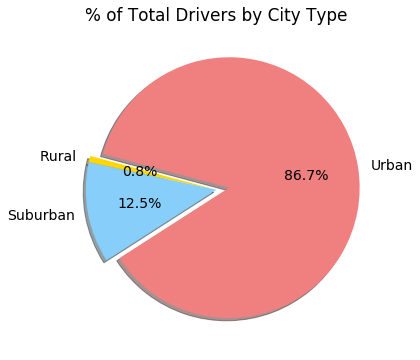

In [68]:
# Create a pie chart by using the MATLAB approach, using the plt.pie() function.
# Build Pie Chart

plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Analysis/Fig7.png")
# Show Figure
plt.show()



# PyBer_Challenge Here




### Create a PyBer Summary DataFrame



#### Get the total rides, total drivers, and total fares for each city type using the groupby() function on the city type.

In [69]:
# Get the sum of the FARES($) for each city type, to get the Series with the total num of FARES/each city.

total_fares_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [70]:
# Get the sum of the DRIVERS for each city type, to get the Series with the total num of DRIVERS/each city.

total_drivers_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [71]:
# Get the total (count) RIDES for each city type, to get the Series with the total num of RIDES/each city.

total_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

#### Calculate the average fare per ride and the average fare per driver by city type.

In [72]:
# Calculate the average fare per ride by city type.

avg_fare_ride_citytype = total_fares_type / total_rides_type
avg_fare_ride_citytype


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [73]:
# Calculate the average fare per driver by city type.

avg_fare_driver_citytype = total_fares_type / total_drivers_type
avg_fare_driver_citytype

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64


#### Create the summary DataFrame with the appropriate columns and apply formatting where appropriate.

In [74]:
# Summary DF

PyBer_summary_df = pd.DataFrame({"Total Rides": total_rides_type, "Total Drivers":total_drivers_type, "Total Fares":total_fares_type,
                                "Average Fare per Ride":avg_fare_ride_citytype, "Average Fare per Driver":avg_fare_driver_citytype})

#Format
PyBer_summary_df["Total Fares"] = PyBer_summary_df["Total Fares"].map("${:,.2f}".format)
PyBer_summary_df["Average Fare per Ride"] = PyBer_summary_df["Average Fare per Ride"].map("${:.2f}".format)
PyBer_summary_df["Average Fare per Driver"] = PyBer_summary_df["Average Fare per Driver"].map("${:.2f}".format)

PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [75]:
# Delete the index name

#del PyBer_summary_df.index.type

PyBer_summary_df.index.type = None
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67




### Create a Multiple-Line Plot for the Sum of the Fares for Each City Type

In [76]:
# Use initial Merged DF frame from module --- rename columns
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [77]:
# Rename columns in the merged DF

pyber_col_rename_df =pyber_data_df.rename(columns= {'city': 'City', 'date':'Date','fare':'Fare',
                'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

#Set Index to the Date column
pyber_col_rename_df.set_index('Date',inplace=True)
pyber_col_rename_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...
4/29/2019 17:04,Michaelberg,13.38,8.550370e+12,6,Rural
1/30/2019 0:05,Lake Latoyabury,20.76,9.018730e+12,2,Rural
2/10/2019 21:03,North Jaime,11.11,2.781340e+12,1,Rural


In [78]:
# Create a new DataFrame for fares and include only:
# the Date, City Type, and Fare columns using the copy() method on the merged DataFrame.

new_fares_df = pyber_col_rename_df.copy()
new_fares_df.drop(['City', 'Ride Id', 'No. Drivers'], axis = 1, inplace = True)

new_fares_df

,Fare,City Type
Date,,
1/14/2019 10:14,13.83,Urban
3/4/2019 18:24,30.24,Urban
2/24/2019 4:29,33.44,Urban
2/10/2019 23:22,23.44,Urban
3/6/2019 4:28,34.58,Urban
...,...,...
4/29/2019 17:04,13.38,Rural
1/30/2019 0:05,20.76,Rural
2/10/2019 21:03,11.11,Rural


In [79]:
#5 Set the index to the datetime data type.

# Converting the index as date
new_fares_df.index = pd.to_datetime(new_fares_df.index)

# Extracting hour & minute
new_fares_df[''] = new_fares_df.index.hour
new_fares_df[''] = new_fares_df.index.minute

#Drop the extra date column(had no title)
new_fares_df.drop([''], axis = 1, inplace = True)
new_fares_df

,Fare,City Type
Date,,
2019-01-14 10:14:00,13.83,Urban
2019-03-04 18:24:00,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:00,23.44,Urban
2019-03-06 04:28:00,34.58,Urban
...,...,...
2019-04-29 17:04:00,13.38,Rural
2019-01-30 00:05:00,20.76,Rural
2019-02-10 21:03:00,11.11,Rural


In [80]:
# Check the DataFrame using the info() method to make sure the index is a datetime data type.
# Exploratory analysis of the data

new_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB



#### Calculate the sum() of fares by the type of city and date using groupby() to create a Series.

In [81]:
sum_fares_type_date = new_fares_df.groupby(["Date", "City Type"]).sum()["Fare"]
sum_fares_type_date

Date                 City Type
2019-01-01 00:08:00  Urban        37.91
2019-01-01 00:46:00  Suburban     47.74
2019-01-01 02:07:00  Suburban     24.07
2019-01-01 03:46:00  Urban         7.57
2019-01-01 05:23:00  Urban        10.75
                                  ...  
2019-05-08 04:20:00  Urban        21.99
2019-05-08 04:39:00  Urban        18.45
2019-05-08 07:29:00  Urban        18.55
2019-05-08 11:38:00  Urban        19.77
2019-05-08 13:10:00  Urban        18.04
Name: Fare, Length: 2364, dtype: float64

In [82]:
# Convert the groupby() Series into a DataFrame. Code format:  Series.to_frame()
# Gave it a new DF name "sum_fares_typedate_df"

sum_fares_typedate_df = sum_fares_type_date.to_frame()
sum_fares_typedate_df

,,Fare
Date,City Type,
2019-01-01 00:08:00,Urban,37.91
2019-01-01 00:46:00,Suburban,47.74
2019-01-01 02:07:00,Suburban,24.07
2019-01-01 03:46:00,Urban,7.57
2019-01-01 05:23:00,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [83]:
# Reset the index, which is needed for Step 10.  df.reset_index(inplace=True)

new_df= sum_fares_typedate_df.reset_index()
new_df
#um_fares_typedate_df

,Date,City Type,Fare
0,2019-01-01 00:08:00,Urban,37.91
1,2019-01-01 00:46:00,Suburban,47.74
2,2019-01-01 02:07:00,Suburban,24.07
3,2019-01-01 03:46:00,Urban,7.57
4,2019-01-01 05:23:00,Urban,10.75
...,...,...,...
2359,2019-05-08 04:20:00,Urban,21.99
2360,2019-05-08 04:39:00,Urban,18.45
2361,2019-05-08 07:29:00,Urban,18.55
2362,2019-05-08 11:38:00,Urban,19.77


In [84]:
# Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row.
# code sample: table = pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum, fill_value=0, margins=True, margins_name="Total")

PyBer_pivot_df = new_df.pivot(index = "Date", columns="City Type", values=["Fare"])
PyBer_pivot_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 02:07:00   NaN    24.07    NaN
2019-01-01 03:46:00   NaN      NaN   7.57
2019-01-01 05:23:00   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:00   NaN      NaN  18.45
2019-05-08 07:29:00   NaN      NaN  18.55
2019-05-08 11:38:00   NaN      NaN  19.77
2019-05-08 13:10:00   NaN      NaN  18.04

[2361 rows x 3 columns]

In [85]:
# Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using .loc function.
                      
newdf_pivot_date_df= PyBer_pivot_df.loc['2019-01-01':'2019-04-28'] 
newdf_pivot_date_df.head()

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 02:07:00   NaN    24.07    NaN
2019-01-01 03:46:00   NaN      NaN   7.57
2019-01-01 05:23:00   NaN      NaN  10.75

In [86]:
# Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, 
# and calculate the sum() of the fares for each week.

weekly_resampled_df = newdf_pivot_date_df.Fare.resample('W').sum() 
weekly_resampled_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [111]:

weekly_resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
Rural       17 non-null float64
Suburban    17 non-null float64
Urban       17 non-null float64
dtypes: float64(3)
memory usage: 544.0 bytes




### Using the object-oriented interface method, plot the DF you created above using the df.plot() function.

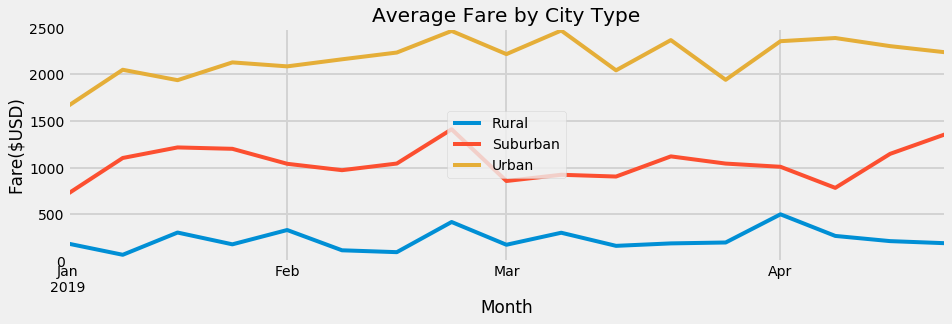

In [147]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style

# Plot Style
style.use('fivethirtyeight')

#reading data from datagrame using the df.plot() function
ax =weekly_resampled_df.plot(figsize=(14,4))

#Formatting
ax.set_title("Average Fare by City Type")
ax.legend(loc='center')
ax.set_xlabel('Month')
ax.set_ylabel("Fare($USD)")
ax.set_ylim(0, 2500)
ax.grid(color='lightgrey', linestyle='-', linewidth=2)
ax.patch.set_edgecolor('lightgrey')  
ax.patch.set_linewidth('1')  

# Save the figure.
plt.savefig("Analysis/Fig8.png")